# An Insight into the Apps in the Google Play Store

INTRODUCTION:

The ubiquitous usage of apps help individuals and businesses unlock extraordinary opportunities and reach their 
outcomes faster. The App market has been evolving rapidly for over a decade. While both the Google Play Store and the iTunes App Store platforms satisfy the same user needs, I  will be exploring the Google Play Store App dataset to find out why users download Google Store apps in a given category.

INSPIRATION : 

When I switched from Android to Apple iOS in 2016, I encountered difficulties in downloading apps from the iTunes Store. Not only were the guidelines complicated, but it also required the use of an iCloud account to download apps from the iTunes App store. Additionally, I was completely locked out from my iCloud account. This prevented me from using the iTunes App Store. Unlike the iTunes Store, I find the Google Play app store much convenient and user-friendly. The Google Play Store App entails a wide variety of app choices and can easily be accessed through multiple devices. 

GOAL: 

Examine the performance of the different app features and analyze user engagement metrics in the Google Play Store. 

# Questions to Explore:
    
1. What are the most popular app categories in the Google Play Store?

2. What is the most common app Type among users?

3. How does user Reviews impact app downloads in the Google Play Store?


# Libraries: 

I'd like to start off by importing the following packages: 

In [3]:
# Importing packages
import pandas as pd
import numpy as np
import datetime as dt
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 

The Pandas and NumPy modules are essential for data analysis in Python. NumPy's main feature is the ndarray class, a fast and efficient data structure object. Pandas is the core data science library for Python, providing the Series and DataFrame classes for flexible handling of large datasets.

We, additionally, require the matplotlib library for data visualization. This Python plotting module integrates with the pandas and numpy modules to create beautiful images with data.

# A. Exploring The Dataset

# The Dataset

If you were to explore the dynamics of the Google Play Store, notice that each app is organized according to its inherent features. Each app is grouped into a specific category which provides the user an insight on how to browse the app. He can then further specify the app he is looking for according to his preference. For example, let's say you are looking for an app on Brain Games, the playstore captures the app from it's category and further specifies it according to its 'Genre'.

Let's now take a look into the features of the Google Play Store and analyze the data further.

In [4]:
# Loading data from the csv file. 
playstore = pd.read_csv("googleplaystore.csv")
playstore.head()   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


The Google Play Store gives us an overview on how the app is performing. We can determine the performance of the app simply by looking at 'Rating', 'Reviews', and 'Installs' features.  Additionally, users are given the choice to decide the 'Type' of the app. While most of the apps are free, there are certain apps available for users at a price point. 

Users can then check the size of the app from the 'Size' feature. Size specifies the capacity a given app may take when downloading it to your device. Content Rating specifies the age groups of the rated apps.

Next, let's explore the contents of the Google Play Store dataset.

In [3]:
playstore.info() # This function gives a clear picture of the data in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Since most of the datatypes appear to be objects, I will take the following steps in cleaning the dataset:

- remove duplicates.
- change 'Size' to numeric
- remove the '+' and ',' signs in 'Installs'
- remove the '$' in Price and convert it to a float
- remove the Null values in the dataset
- convert the 'Last Updated Date' string to datetime objects
- convert datatypes of Installs and Reviews from object to integer values

In [4]:
# Data Cleaning:

#1 Removing duplicates.
playstore = playstore.drop_duplicates(subset='App') 
playstore.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])  

In [5]:
#2 Data Cleaning for Size: 
playstore['Size'] = playstore['Size'].map(lambda x: x.rstrip('M'))
playstore['Size'] = playstore['Size'].map(lambda x: x.rstrip('K'))

#3 Data Cleaning for Installs: Removing '+'
playstore['Installs'] = playstore['Installs'].map(lambda x: x.rstrip('+')) 
playstore['Installs'] = playstore['Installs'].str.replace(',', '')

#4 Data Cleaning for Price:
playstore['Price'] = playstore['Price'].map(lambda x: x.lstrip('$').rstrip())
playstore['Price'] = playstore.Price.astype(float) 

#5 Removing the null values from the Play Store dataset.
playstore = playstore[~(playstore.Rating.isnull())] 

#6 Converting the Last Updated date strings to Datetime objects
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated']) 

In [6]:
#7 Convert Installs and Reviews into Integer
playstore['Installs'] = playstore.Installs.astype(int) 
playstore['Reviews'] = playstore.Reviews.astype(int)   

Here's a clean view of my dataset after peforming the above functions.

In [7]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Now that we have a clean set of data of the Google Play Store, let's explore the dimensions of the Google Play Store dataset. 

In [8]:
playstore.shape # Returns the dimensions of the dataset. 

(8190, 13)

# Statistical Analysis

Let us now use descriptive statistics to get an insight into the quantitative features of the Google 
Play store. 

In [9]:
# Conducting Summary Statistics: 
playstore.describe()    

,Rating,Reviews,Installs,Price
count,8190.000000,8.190000e+03,8.190000e+03,8190.000000
mean,4.173321,2.554354e+05,9.171613e+06,1.038342
std,0.536691,1.986309e+06,5.827170e+07,16.864040
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.000000e+05,0.000000
75%,4.500000,4.391425e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


The statistics above illustrate the important measures of central tendency. In this report, I will describe one of the variables in the Google Play Store (Rating). As shown above, the average rating for an app is 4.17. This is a really good Rating as it implies that on average users are happy about the performance of a given app. Next, the median describes the value separating the higher half from the lower half. In other words, it is the value that lies in the middle. Notice the rise of apps from 4.0 to 4.5 on the histogram(below). Since the median is 4.3, it is evident that apps are rated fairly well in the Google Play Store.

To illustrate further, let us now visualize the shape of the data in Rating using two graphs. 

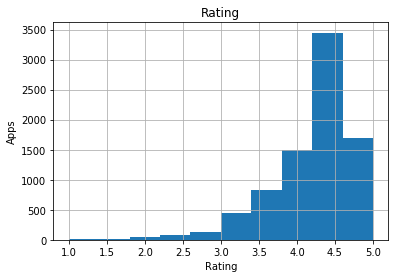

In [10]:
# Assessing the Shape and spread of the Google Play Store dataset through a histogram.
playstore.hist(column="Rating") 
plt.xlabel("Rating")  
plt.ylabel("Apps")
plt.show() 

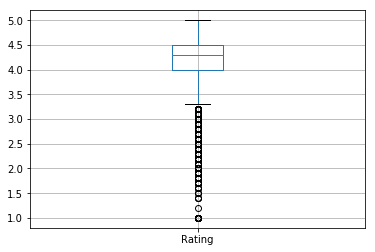

In [11]:
# Plot a boxplot
playstore.boxplot("Rating") 
plt.show() 

I created the histogram to get a sense of the shape of the distribution of Rating. Notice, the tail to the left of the histogram. The data in the histogram are left-skewed because the mean is smaller than the median (4.1 < 4.3). In a left-skewed distribution, there appears to be a long tail in the negative direction of the Rating. It is also evident that not many apps are rated poorly (below 3.0) in the Google Play Store.

The Box Plot, on the other hand, tells us about the spread of values of  Rating in our dataset. There are a few outliers below the lower whisker in our boxplot. An outlier in distribution is a data point that is located outside the whiskers. Our visualization informs us that certain apps are rated below 3.3 in the Google Play Store.

I will now compute the variance to see how far the set of numbers are spread out from its average. 

In [12]:
playstore.var(axis=0) # Calculating the variance of the features.

Rating      2.880377e-01
Reviews     3.945425e+12
Installs    3.395591e+15
Price       2.843958e+02
dtype: float64

The variance for Rating is 0.029 meaning it is slightly spread out from the average(mean) of Rating.

# Student's t-Test

The Student’s t-test compares two averages (means) and informs if they are different from each other. It tells us how significant the differences are. 

Here, I will test the metrics for significant differences in the mean between Reviews and Installs. A significant difference may indicate that the metric is important. Additionally, the average of each app reviewed in the Google Play Store will be compared to the average number of apps installed. These comparisons are made for every statistics in the Play Store.

Although the app Reviews and Installs are not normally distributed, I chose to apply the popular Student's t-test to compare the sample means of Reviews and Installs metrics because the large sample sizes in the Google Playstore dataset may mean that the t-statistic will be a very good approximation.

Let me start by defining the hypotheses: 

- Null Hypothesis: There is no relationship between app Reviews and Installs.
- Alternative Hypothesis: There is a relationship between app Reviews and Installs.

In constructing the t-Test I will make the following assumptions:

- The observations are independent
- The Confidence Level(Sigma) is 0.05

In [13]:
# Caluculating the mean of Reviews and Installs
print("Mean")
mean1 = playstore.loc[:,"Reviews"].mean()
mean2 = playstore.loc[:,"Installs"].mean() 
print(mean1, mean2)

print("Standard Deviation")
std1 = playstore.loc[:,"Reviews"].std()
std2 = playstore.loc[:,"Installs"].std()
print(std1, std2)

Mean
(255435.43907203907, 9171612.861782663)
Standard Deviation
(1986309.4786981614, 58271701.779508986)


In [14]:
from scipy.stats import ttest_ind_from_stats

ttest_ind_from_stats(mean1=255435.43907203907, std1=9171612.861782663, nobs1=8190,
                     mean2=1986309.4786981614, std2=58271701.779508986, nobs2=8190)

Ttest_indResult(statistic=-2.655436420830131, pvalue=0.007928251684936256)

The t-Test results are evaluated by taking into account the p-value. In statistical hypothesis testing, p-value weighs the strength of the evidence gathered through our data so that we can determine which claim is true. The p-value is a number between 0 and 1 and any value which falls below the confidence interval should be rejected.

In evaluating our statistics on Reviews and Installs it is evident that the probability value(p-value=0.0079) is below the significance level(0.05). Given that the p-value is below our level of significance(p ≤ 0.05), the null hypothesis should be rejected. In other words, it is statistically significant that there is a relationship between app Reviews and Installs.

# B. Analytic Questions

# What are the most popular app categories in the Google Play Store?

Let's now explore the app categories in the Google Play Store and then see how they are rated. My goal here is to find the top-rated app categories in the Google Play Store.

In [15]:
# What categories are available in the Google Play Store? 

Category = playstore['Category'].value_counts().index.values
Category 

array(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'PRODUCTIVITY', 'LIFESTYLE',
       'PERSONALIZATION', 'MEDICAL', 'PHOTOGRAPHY', 'BUSINESS', 'SPORTS',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES',
       'SOCIAL', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'BOOKS_AND_REFERENCE',
       'VIDEO_PLAYERS', 'DATING', 'EDUCATION', 'MAPS_AND_NAVIGATION',
       'ENTERTAINMENT', 'FOOD_AND_DRINK', 'AUTO_AND_VEHICLES', 'WEATHER',
       'LIBRARIES_AND_DEMO', 'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'COMICS',
       'PARENTING', 'EVENTS', 'BEAUTY'], dtype=object)

In [16]:
# What is the app count in each Category?

count = playstore.Category.value_counts()  # Function returns the total number of apps used in each category.
count 

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
PHOTOGRAPHY             263
BUSINESS                263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [17]:
# What are the ratings per category?
Rating = playstore.Rating.value_counts('Category').index.values 
Rating

array([4.3, 4.4, 4.5, 4.2, 4.6, 4.1, 4. , 4.7, 3.9, 3.8, 5. , 3.7, 4.8,
       3.6, 3.5, 3.4, 3.3, 4.9, 3. , 3.1, 3.2, 2.9, 2.8, 2.6, 2.7, 2.3,
       2.5, 2.4, 1. , 2.2, 2. , 1.9, 1.8, 1.7, 2.1, 1.6, 1.4, 1.5, 1.2])

In [18]:
# What are the top rated apps according to Category and Rating?
playstore.groupby(['Category','Rating']).size().nlargest(10).transpose()

Category  Rating
FAMILY    4.3       177
          4.4       164
          4.5       158
          4.2       151
          4.6       132
GAME      4.3       129
          4.4       122
          4.5       122
FAMILY    4.1       118
GAME      4.2       105
dtype: int64

In [19]:
# What is the app count in each Category?
print("count")
count = playstore.Category.value_counts()  # Function returns the total number of apps used in each category.
count

# What categories include the highest rated app?
print("top_apps")
top_apps = count.nlargest().head()
top_apps

count
top_apps


FAMILY          1607
GAME             912
TOOLS            717
FINANCE          302
PRODUCTIVITY     301
Name: Category, dtype: int64

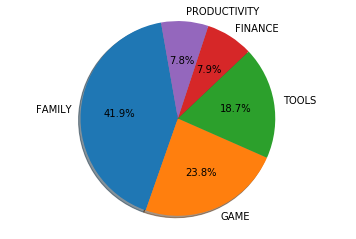

In [20]:
# Plotting the top rated app categories.

labels = top_apps.index.values
num_apps = top_apps.values

fig1, ax1 = plt.subplots()
ax1.pie(num_apps, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Our data reveal that the top-rated app categories include Family, Game, Tools, Finance, and Productivity. The data informs us that more than 1500 apps have been rated in the 'Family' app category. 

# What is the most common app Type among users?

Let's learn about the app types in the Google Play Store:

In [21]:
# What Type of apps are currently available in the Google Play Store?

playstore['Type'].unique() 

array(['Free', 'Paid'], dtype=object)

The Google Play Store consist of both free and paid apps. Now, let's determine the number of Free apps and Paid apps.

In [22]:
# How many apps are Free vs Paid in the Google Play Store?

Type = ['Free', 'Paid']

count = playstore.Type.value_counts() 
count

Free    7588
Paid     602
Name: Type, dtype: int64

In [23]:
# What is the percentage of Free vs Paid apps: 
app_type = playstore['Type'].value_counts(normalize=True) * 100
app_type 

Free    92.649573
Paid     7.350427
Name: Type, dtype: float64

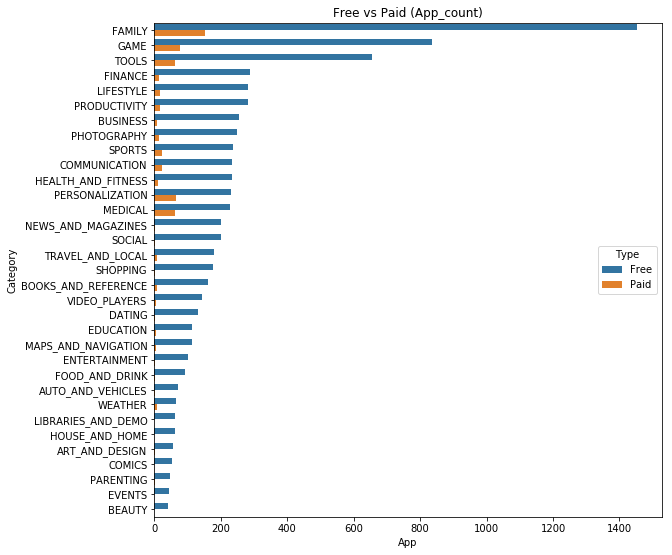

In [24]:
# Plots the total number of Free and Paid apps according to Categories.

fvp = playstore.groupby(['Category','Type']).count()[['App']].reset_index().sort_values(by="App",ascending = False)
plt.figure(figsize=(20,20))
ax=plt.subplot(221)
plt.title("Free vs Paid (App_count)") 
g=sns.catplot(x="App", y="Category",kind="bar", hue="Type", ax=ax,data=fvp)
plt.close(2) 

Google Play Store groups the apps into two types Free vs Paid. 92.6% of users have been using Free apps in the Google Play Store, which means that there is a high demand for the apps that are relatively free in the Google Play Store. Family, Game, and Tools app categories contain the highest number of Free apps. 

# How does user Reviews impact the apps downloaded? 

In [25]:
# Is there a relationship between Category and Reviews?
Reviews = playstore.groupby(['Category','Reviews']).size().nlargest(10)
Reviews

Category  Reviews
FAMILY    4          25
          7          19
          1          16
          3          16
          5          16
          13         16
          2          15
          12         14
          6          13
          8          11
dtype: int64

In [26]:
# Is there a relationship between Category and Installs?
Installs = playstore.groupby(['Category','Installs']).size().nlargest(10) 
Installs

Category  Installs
FAMILY    1000000     258
          100000      247
          10000       224
GAME      10000000    186
FAMILY    1000        167
GAME      1000000     159
FAMILY    10000000    132
GAME      100000      111
FAMILY    500000      104
          5000000     103
dtype: int64

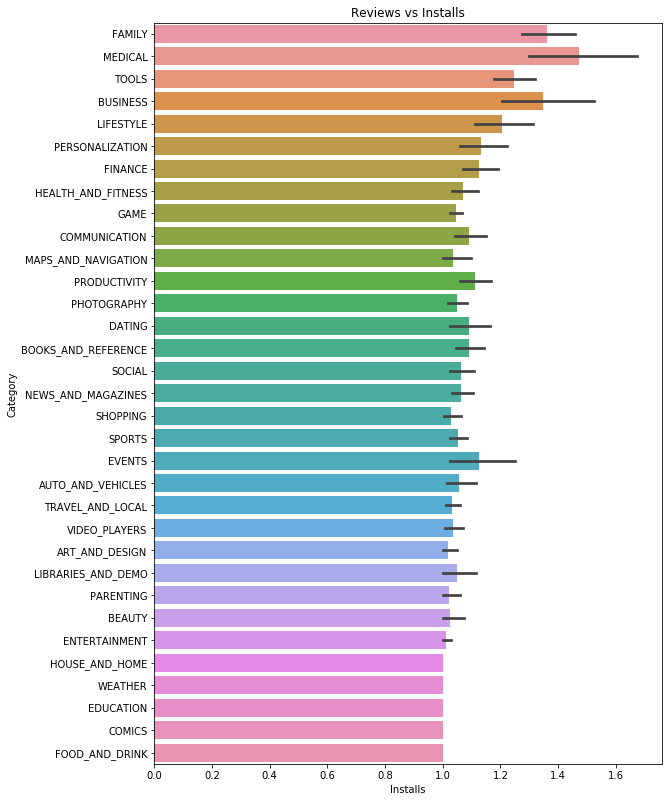

In [27]:
# Plotting to check the relationship between Reviews and Installs in a given Category.

fvp = playstore.groupby(['Category','Reviews']).count()[['Installs']].reset_index().sort_values(by="Installs",ascending = False)
plt.figure(figsize=(20,30))
ax=plt.subplot(221)
plt.title("Reviews vs Installs")  
g=sns.catplot(x="Installs", y="Category", kind="bar", ax=ax,data=fvp)
plt.close(2) 

The chart above represents the positive relationship between Reviews and Installs. The most reviewed apps are downloaded by the majority of users. In combining reviews and installs the top three categories that perform well are Medical, Family, and Business. The results imply that users download the apps which are frequently reviewed and rated. 

To enumerate further, I gathered further evidence by testing the mean of Reviews and Installs (shown above) to understand if there is a relationship between the two variables. From the data gathered and plotted above it is evident that user reviews impact the downloads in the Google Play Store.

# C. Key Takeaways:

Now that we have analyzed certain features in the Google Play Store, we gathered information about the best-rated app categories, the type of apps used by most users, and tested to see the relationship between app reviews and downloads.

Significantly, users are actively engaged in utilizing the apps in the Google Play Store. For this project, I used user engagement metrics to analyze the data through user Ratings, Reviews, and Installs. On average the rating per app is 4.1. Users have also reviewed the app more than 200,000 times. Furthermore, users utilize more Free apps(92.6%) than the Paid apps in the Google Play Store.

The insights I chose are some of the more intriguing examples but are by no means a complete account of the possible queries one might want to answer.

# D. Limitations and Future Work:

- Student t-test assumes that the observations are independent, which in reality is not true because the number of installs depend on the number of apps being reviewed or rated. 


- This particular dataset from the Google Play Store analyzes only 33 categories. New categories have now been added to the Google Play Store. This may mean that there could be new features to explore further.


- I did not analyze the app size and price aspects of the dataset in this report. For further research, I will conduct a regression analysis to get a better sense of user engagement of the Google Play Store. 

# E: Resources

Below is a collection of links to documentation, tutorials, and other information I found useful during this project.

- My primary database. Source of CSV retrieved through Kaggle: https://www.kaggle.com/lava18/google-play-store-apps

- "Python for Data Analysis" by Wes McKinney. O'Reilly Publishers.

- Plotting. Matplotlib is an open source Python library. Home Page.

- Code formatting. Google's Python Style Guide.

- Coding queries. Stack Overflow: https://stackoverflow.com/

- Pandas I/O documentation : https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
